# Обработка данных, полученных с программы
## Потенциал ямы с бесконечными стенками

In [69]:
# Импротируем необходимые функции
import numpy as np # работа с массивами и линейной алгеброй
import matplotlib.pyplot as plt # для отрисовки графиков
import pandas as pd # для чтения и работы с данными
from scipy.optimize import curve_fit # фитирующая процедура

In [70]:
def psi_f(x):
    return np.sin(np.pi*x/3)*np.sqrt(2)/np.sqrt(3)

def integrate_hist(hist, bin_edges):
    integral = 0
    for i in range(len(hist)):
        integral += hist[i]*(bin_edges[i+1] - bin_edges[i])
    return integral

def distr(df):
    pedestrians, bin_edges = np.histogram(df, bins = 1000)
    #print bin_edges
    
    width = bin_edges[1] - bin_edges[0]
    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], pedestrians, width = width, align= 'edge')
    plt.xlabel('Ось x'.decode('utf-8'))
    plt.ylabel('Количество пешеходов (N)'.decode('utf-8'))
    plt.title('Распределение пешеходов по оси'.decode('utf-8'))
    plt.legend()
    plt.show()
    
    pedestrians_sq = pedestrians*pedestrians
    norm = integrate_hist(pedestrians_sq, bin_edges)
    psi_sq = pedestrians_sq/norm
    psi = pedestrians/np.sqrt(norm)

    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], psi, width = width, align= 'edge')
    plt.xlabel('x'.decode('utf-8'))
    plt.ylabel('$\psi(x)$'.decode('utf-8'))
    plt.title(''.decode('utf-8'))
    ###
    x = np.arange(0, 3.1, 0.1)
    plt.plot(x, psi_f(x), color = 'black', label = '$\psi(x)$, теоретическая'.decode('utf-8'))
    plt.legend()
    plt.ylim(0, 1)
    plt.show()
    
    plt.figure(figsize=(7,7))
    plt.bar(bin_edges[:-1], psi_sq, width = width, align= 'edge')
    plt.xlabel('x'.decode('utf-8'))
    plt.ylabel('$\psi^2(x)$'.decode('utf-8'))
    plt.title('Плотность вероятности'.decode('utf-8'))
    plt.plot(x, psi_f(x)**2, color = 'black', label = '$\psi^2(x)$, теоретическая'.decode('utf-8'))
    plt.legend()
    plt.ylim(0, 1)
    plt.show()

In [71]:
#frame = pd.read_csv('D:\Backup(work)\data_output\output_sin(1000000x1000)_ds=0.1\output.csv')
frame = pd.read_csv('C:\Users\George\Desktop\git_projects\C_plus_plus\SchrodingerEq\output\output.csv')

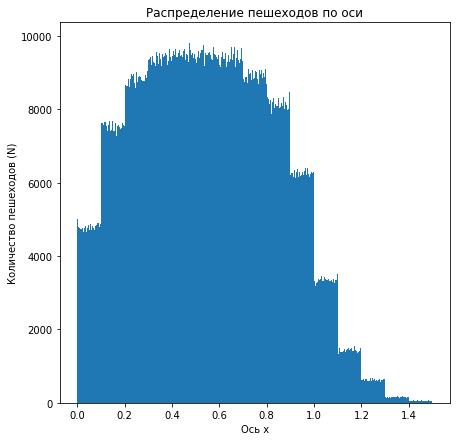

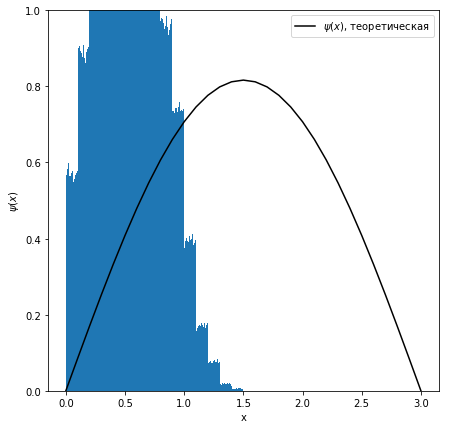

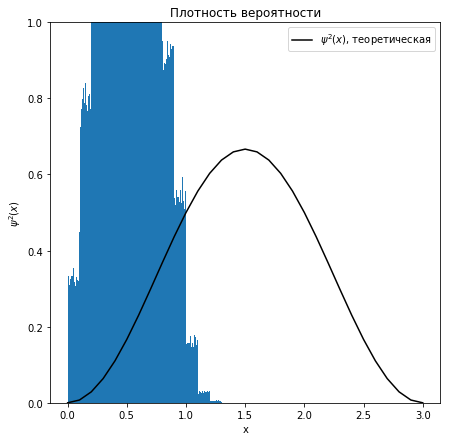

In [72]:
frame.shape
distr(frame)

In [73]:
def drawNE(df):
    plt.figure(figsize=(20,7))
    plt.scatter(np.arange(df.shape[0]), df['N'], linewidths=0.1, label = 'Количество пешеходов'.decode('utf-8') )
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('Количество пешеходов (N)'.decode('utf-8'))
    plt.title('Зависимость N от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(20,8))
    plt.plot(np.arange(df.shape[0]), df['E'], label = 'Данные'.decode('utf-8'))
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('E'.decode('utf-8'))
    plt.title('Зависимость энергии от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()
    
    plt.figure(figsize=(20,8))
    plt.plot(np.arange(df.shape[0]), df['E_r'], label = 'Данные'.decode('utf-8'))
    plt.xlabel('Номер итерации'.decode('utf-8'))
    plt.ylabel('E_r'.decode('utf-8'))
    plt.title('Зависимость опорного потенциала от итерации'.decode('utf-8'))
    plt.legend()
    plt.grid()
    plt.show()

In [74]:
frameNE = pd.read_csv('C:\Users\George\Desktop\git_projects\C_plus_plus\SchrodingerEq\output\outputNE.csv')
#frame10NE = frameNE.drop(frameNE.index[frameNE.shape[0]/10:frameNE.shape[0]])

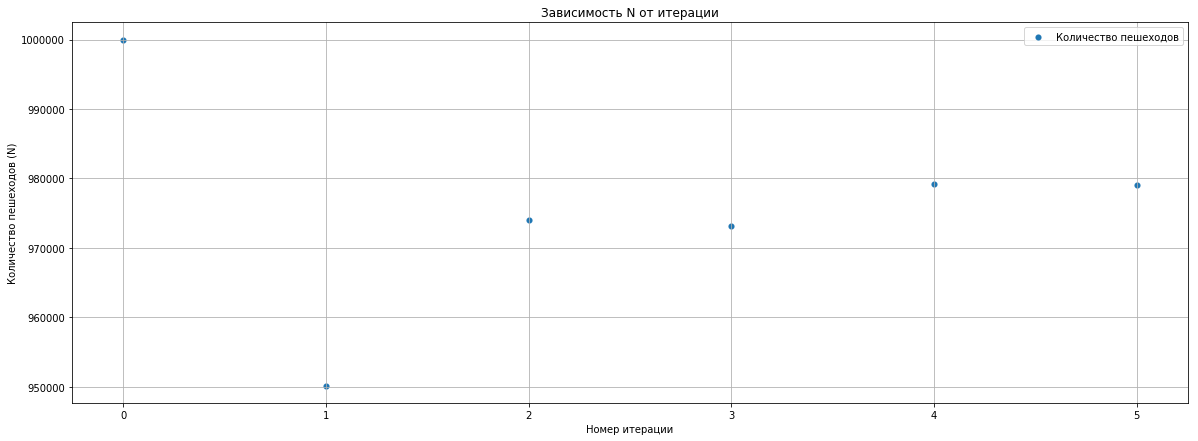

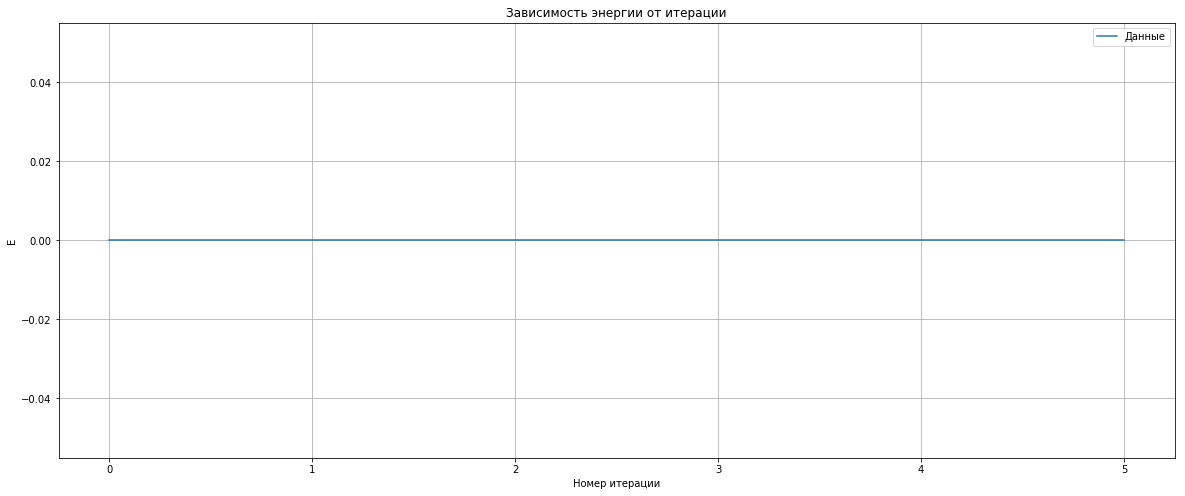

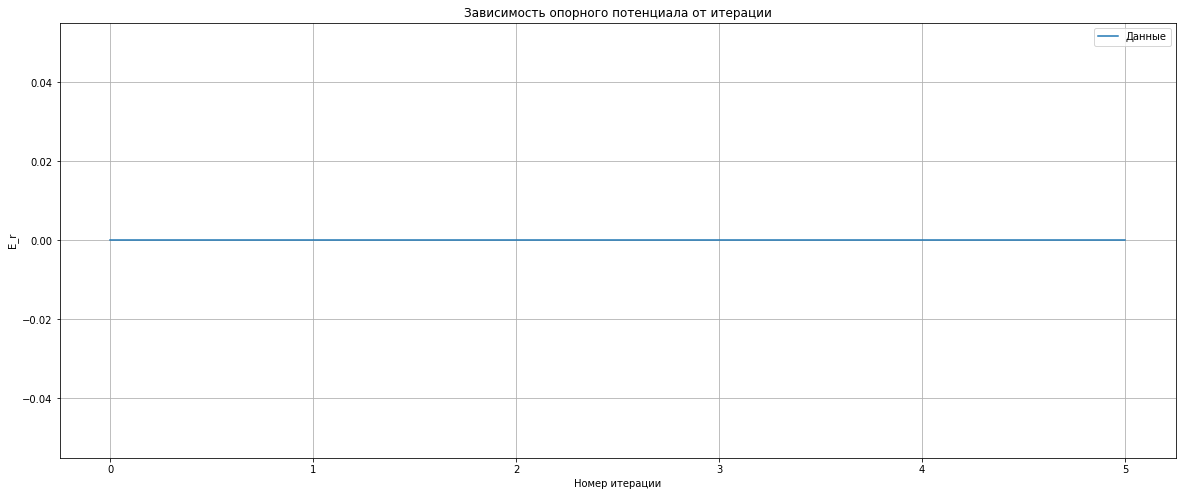

In [75]:
drawNE(frameNE)

In [76]:
frameNE[500:]['E_r'].mean()

nan

1. Поменять порядок диффузии и рождение/уничтожение частиц (для осц.)
2. Вручную уравнивать число пешеходов (добавлять с вероятностью (N-N_0)/N)
5. Переписать прогу для бесконечных стенок (явное уничтожение).
3. Попробовать V_ref = 0 всегда (возникнет ли гребенка) (видео).
4. Видео для бес. стенок.

6. Начальное расположение частиц поменьше (не ширина ямы!)

In [77]:
def one_hist(df, num, frame_av, frameNE):
    print df
    pedestrians, bin_edges = np.histogram(df, 200)
    print pedestrians
    pedestrians_sq = pedestrians*pedestrians
    norm = integrate_hist(pedestrians_sq, bin_edges)
    psi_sq = pedestrians_sq/norm
    psi = pedestrians/np.sqrt(norm)
    
    x = np.arange(0, 3.1, 0.1)

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10), dpi = 200)
    ax[0][0].bar(bin_edges[:-1], psi_sq, width = bin_edges[1]-bin_edges[0], align= 'edge')
    ax[0][0].set_xlabel('x'.decode('utf-8'))
    ax[0][0].set_ylabel('$\psi^2(x)$'.decode('utf-8'))
    ax[0][0].set_title('Плотность вероятности'.decode('utf-8'))
    ax[0][0].plot(x, psi_f(x)**2, color = 'black', label = '$\psi^2(x)$, теоретическая'.decode('utf-8'))
    ax[0][0].set_title('Усреднение по итерациям'.decode('utf-8') + "[" + str((num-1)*frame_av + 1).decode('utf-8') + ":" + str((num)*frame_av).decode('utf-8') + "]")
    ax[0][0].legend()
    ax[0][0].set_ylim(0,1.5)
    ax[0][0].set_xlim(0,3)
    
    ax[1][0].bar(bin_edges[:-1], psi, width = bin_edges[1]-bin_edges[0], align= 'edge')
    ax[1][0].set_xlabel('x'.decode('utf-8'))
    ax[1][0].set_ylabel('$\psi(x)$'.decode('utf-8'))
    ax[1][0].set_title('Плотность вероятности'.decode('utf-8'))
    ax[1][0].plot(x, psi_f(x), color = 'black', label = '$\psi^2(x)$, теоретическая'.decode('utf-8'))
    ax[1][0].set_title('Усреднение по итерациям'.decode('utf-8') + "[" + str((num-1)*frame_av + 1).decode('utf-8') + ":" + str((num)*frame_av).decode('utf-8') + "]")
    ax[1][0].legend()
    ax[1][0].set_ylim(0,1.5)
    ax[1][0].set_xlim(0,3)
    
    ax[0][1].plot(np.arange(frameNE[0:num*frame_av]['E'].shape[0]), frameNE[0:num*frame_av]['E'], label = 'Данные'.decode('utf-8'))
    ax[0][1].set_xlabel('Номер итерации'.decode('utf-8'))
    ax[0][1].set_ylabel('E'.decode('utf-8'))
    ax[0][1].set_title('Зависимость энергии от итерации'.decode('utf-8'))
    ax[0][1].set_xlim(0,300)
    ax[0][1].set_ylim(0,1)
    ax[0][1].legend()
    ax[0][1].grid()
    
    ax[1][1].scatter(np.arange(frameNE[0:num*frame_av]['N'].shape[0]), frameNE[0:num*frame_av]['N'], linewidths=0.1, label = 'Количество пешеходов'.decode('utf-8') )
    ax[1][1].set_xlabel('Номер итерации'.decode('utf-8'))
    ax[1][1].set_ylabel('Количество пешеходов (N)'.decode('utf-8'))
    ax[1][1].set_title('Зависимость N от итерации'.decode('utf-8'))
    ax[1][1].set_xlim(0,300)
    ax[1][1].legend()
    ax[1][1].grid()
    
    path = './gif/'+'hist'+str(num)+'.png'
    
    fig.savefig(path)
    plt.close()
    
    
frame_av = 1
right = 0
for i in range(frameNE[0:501]['N'].shape[0]/frame_av):
    left = right
    right += frameNE[0:501]['N'][i*frame_av:(i+1)*frame_av].sum()
    one_hist(frame[int(left):int(right)], i + 1, frame_av, frameNE[0:501])

               x
0       0.001251
1       0.563568
2       0.193298
3       0.808716
4       0.584991
5       0.479858
6       0.350281
7       0.895935
8       0.822815
9       0.746582
10      0.174103
11      0.858917
12      0.710480
13      0.513519
14      0.303986
15      0.014984
16      0.091400
17      0.364441
18      0.147308
19      0.165894
20      0.988495
21      0.445679
22      0.119080
23      0.004669
24      0.008911
25      0.377869
26      0.531647
27      0.571167
28      0.601746
29      0.607147
...          ...
999970  0.887543
999971  0.788300
999972  0.475098
999973  0.276245
999974  0.701630
999975  0.198273
999976  0.112061
999977  0.493195
999978  0.481689
999979  0.122009
999980  0.879364
999981  0.585358
999982  0.993561
999983  0.309082
999984  0.886322
999985  0.651215
999986  0.163086
999987  0.818573
999988  0.946198
999989  0.778534
999990  0.643311
999991  0.441711
999992  0.934021
999993  0.096802
999994  0.282623
999995  0.423065
999996  0.2474

                x
3897369  0.563568
3897370  0.193298
3897371  1.008716
3897372  0.784991
3897373  0.679858
3897374  0.550281
3897375  1.095935
3897376  0.822815
3897377  0.746582
3897378  0.174103
3897379  0.858917
3897380  0.710480
3897381  0.313519
3897382  0.503986
3897383  0.214984
3897384  0.364441
3897385  0.147308
3897386  0.988495
3897387  0.645679
3897388  0.004669
3897389  0.377869
3897390  0.331647
3897391  0.571167
3897392  0.601746
3897393  0.607147
3897394  0.166229
3897395  0.663025
3897396  0.450775
3897397  0.807666
3897398  0.783295
...           ...
4876596  0.360284
4876597  0.163007
4876598  0.969989
4876599  0.261066
4876600  0.922180
4876601  0.937714
4876602  0.550568
4876603  0.091553
4876604  0.364117
4876605  0.944019
4876606  0.497070
4876607  0.119153
4876608  0.456104
4876609  0.281451
4876610  0.556958
4876611  0.391968
4876612  0.357465
4876613  0.867584
4876614  0.153180
4876615  0.767139
4876616  0.435944
4876617  0.285431
4876618  0.056165
4876619  0

In [29]:
del frameNE